# Cálculo de empuje sobre un cilindro apoyado en el fondo

![](Fig1.png)


## Método 1: Integración de presiones

In [1]:
import sympy as sp
import numpy as np

In [2]:
p,dF,F,p0,rho,g,L,h,R,theta,phi = sp.symbols('p,dF,F,p0,rho,g,L,h,R,theta,phi')

Para un cierto ángulo $\phi$, el $dS$ se encuentra a una profundidad
$$
h_\phi = h - R\left[\cos\left(\frac{\theta}{2}\right)-\cos \phi \right]
$$
y la componente vertical de la fuerza es 
$$ 
\text{d}\mathbf{F}_y = (p_0 + \rho g h_\phi) \cos(\phi) L R \text{d}\phi
$$
![](Fig2.png)

In [3]:
p=p0+rho*g*(h-R*(-sp.cos(phi)+sp.cos(theta/2)));p.simplify()

g*rho*(R*(cos(phi) - cos(theta/2)) + h) + p0

Y ahora solo debemos integrar la componente vertical aprovechando la simetria 
$$
F_y = 2 \int_{\frac{\theta}{2}}^{\pi} p \cos(\phi) L R \text{d}\phi
$$

In [4]:
F=2*sp.integrate(L*R*p*sp.cos(phi),(phi,theta/2,sp.pi))
F.simplify()

L*R*(-R*g*rho*theta + R*g*rho*sin(theta) + 2*pi*R*g*rho - 4*g*h*rho*sin(theta/2) - 4*p0*sin(theta/2))/2

## Método 2: Arquímedes

El empuje es el peso de agua del volumen sumergido. Pero hay que tener cuidado. La parte inferior del cilindro no está "sumergida", dado que no está mojada. Por lo tanto solo hay que tener en cuanta el volumen de la extrusion, no de un círculo, sino de un círculo menos el segmento definido por el ángulo $\theta$

![](Fig3.png)

El área del circulo "sumergido" es por tanto,
$$
A_s = \frac{1}{2} R^2(2\pi -\theta)  + R^2 \sin\left(\frac{\theta}{2}\right)\cos\left(\frac{\theta}{2}\right) = R^2\left[\pi -\frac{\theta}{2} + \sin\left(\frac{\theta}{2}\right)\cos\left(\frac{\theta}{2}\right)\right]
$$

La fuerza de empuje si estuviese todo el contorno mojado (no hubiese contacto con fondo) seria
$$
E_0 = \rho g L A_s
$$
pero como el fondo (área $A_h$ en la figura) que tendría una presión uniforme $p_h = \rho g h$ no está, la tenemos que restar
$$
E = E_0 - p_h A_h = E_0 - \rho g h 2 R L \sin\left(\frac{\theta}{2}\right)
$$

In [5]:
As,E,E0=sp.symbols('As,E,E0')

In [6]:
As = R**2*(sp.pi-theta/2) + R**2*sp.sin(theta/2)*sp.cos(theta/2); As

R**2*(pi - theta/2) + R**2*sin(theta/2)*cos(theta/2)

In [7]:
E0 = rho*g*L*As;E0

L*g*rho*(R**2*(pi - theta/2) + R**2*sin(theta/2)*cos(theta/2))

In [8]:
ph,Sh = sp.symbols('ph,Sh')

In [9]:
ph = p0 + rho*g*h

In [10]:
Sh = 2*R*L*sp.sin(theta/2)

In [11]:
E = E0 - ph*Sh;E

-2*L*R*(g*h*rho + p0)*sin(theta/2) + L*g*rho*(R**2*(pi - theta/2) + R**2*sin(theta/2)*cos(theta/2))

Podemos ver que, aunque a simple vista no lo parezca, las expresiones para $F$, calculada con la integral de la distribución de presiones, y la de $E$, calcualda a partir del teorema de Arquímedes, son iguales

In [12]:
sp.simplify(E - F)

0

Calculamos los valores numéricos con lso datos proporcionados en el enunciado:

In [13]:
Fvalue = sp.lambdify((p0,h,L,R,g,rho,theta),F)

In [14]:
Fvalue(1e5,3.5,1,0.5,9.81,1000,np.deg2rad(20))/9.81

-1593.3651133798803

In [15]:
Evalue = sp.lambdify((p0,h,L,R,g,rho,theta),E)

In [16]:
Evalue(1e5,3.5,1,0.5,9.81,1000,np.deg2rad(20))/9.81

-1593.3651133798803

Observamos que el resultado no es el esperado. Según el enuncado, debería ser 91 kg y hacia arriba, y obtenemos casi 1600 hacia abajo.

Dibujamos el valor del empuje en función de $\theta$, el ángulo de contacto

In [17]:
def F_theta(theta):
    return Fvalue(1e5,3.5,1,0.5,9.81,1000,np.deg2rad(theta))/9.81

In [18]:
import matplotlib.pyplot as plt
theta = np.linspace(0,20,101)

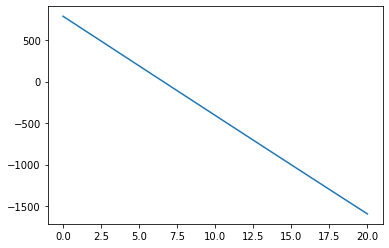

In [19]:
plt.plot(theta,F_theta(theta),'-');

Y observamos que para valores suficientemente pequeños de $\theta$ el valor del empuje es positivo (hacia arriba).

Calculamos para qué $\theta$ el empuje sería nulo

In [20]:
from scipy.optimize import fsolve

In [21]:
fsolve(F_theta,0)

array([6.57571996])

Y para cuál el valor del empuje seria equivalente a 91 kg.

In [22]:
def F_theta_91(theta):
    return Fvalue(1e5,3.5,1,0.5,9.81,1000,np.deg2rad(theta))/9.81 - 91

In [23]:
fsolve(F_theta_91,0)

array([5.81317917])